# Task-2 

---

## Predicting customer's buying behaviour for British Airways

**Purpose:**: Building a predictive model to understand factors that influence customer's buying behaviour and how it can be optimized for better productivity.

* Name: Rahul Kumar
* E-mail: kumar.rahul226@gmail.com

## (A). Importing important packages and libraries:

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import timeit
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
import statistics
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## (B). Loading the given Dataset from local directory:

In [2]:
data = 'D:\AI & Data Science Certifications\British Airways\ML Model\customer_booking.csv'
df = pd.read_csv(data, encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## (C). Exploratory Data Analysis (EDA):

In [3]:
print("\nData size :",df.shape)
print("\nNumber of records :",len(df))
print("\nNumber of atrributes :",len(df.columns))
print("\nDataset Information :", df.info())
df.describe()


Data size : (50000, 14)

Number of records : 50000

Number of atrributes : 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       5000

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


To provide more context, below is a more detailed data description, explaining exactly what each column means:
​
- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking
​

In [4]:
# check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", df.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 0


In [5]:
# checking for null values 

null_val = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / len(df) * (100)})
null_val

,Null Values,Percentage Null Values
num_passengers,0,0.0
sales_channel,0,0.0
trip_type,0,0.0
purchase_lead,0,0.0
length_of_stay,0,0.0
flight_hour,0,0.0
flight_day,0,0.0
route,0,0.0
booking_origin,0,0.0
wants_extra_baggage,0,0.0


In [6]:
# To get the Continous and Categorical Variable
numcol_data = list(df._get_numeric_data().columns)
catcol_data = list(set(df.columns) - set(numcol_data))
print("Continous Variables:", numcol_data,"\nCategorical Variables:", catcol_data)

Continous Variables: ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete'] 
Categorical Variables: ['sales_channel', 'route', 'booking_origin', 'flight_day', 'trip_type']


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
print('Number of numerical columns are:', len(numeric_df.columns))
numeric_df

Number of numerical columns are: 9


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0
49996,1,111,6,4,0,0,0,5.62,0
49997,1,24,6,22,0,0,1,5.62,0
49998,1,15,6,11,1,0,1,5.62,0


In [8]:
from collections import Counter

c = Counter(df['sales_channel'])
print(c)

Counter({'Internet': 44382, 'Mobile': 5618})


In [9]:
c1 = Counter(df['trip_type'])
print(c1)

Counter({'RoundTrip': 49497, 'OneWay': 387, 'CircleTrip': 116})


In [10]:
c2 = Counter(df['route'])
print(c2)

Counter({'AKLKUL': 2680, 'PENTPE': 924, 'MELSGN': 842, 'ICNSIN': 801, 'DMKKIX': 744, 'ICNSYD': 695, 'DMKPER': 679, 'DPSICN': 666, 'DMKOOL': 655, 'MELPEN': 649, 'MELTPE': 644, 'SGNSYD': 614, 'DMKSYD': 532, 'COKSYD': 511, 'COKMEL': 474, 'CMBMEL': 465, 'HNDPEN': 442, 'PENPER': 437, 'DPSPVG': 417, 'CGKICN': 414, 'JHBKTM': 409, 'CGKHND': 389, 'HKTICN': 375, 'PENSYD': 369, 'PERSGN': 361, 'DMKMEL': 351, 'CTSDMK': 350, 'HKTSYD': 346, 'DPSKIX': 342, 'CGKKIX': 338, 'COKPER': 338, 'ICNPER': 335, 'HKTPER': 327, 'CMBSYD': 317, 'KTMPEN': 314, 'DPSHND': 313, 'PERTPE': 312, 'ICNPEN': 299, 'ICNMEL': 298, 'OOLSGN': 296, 'HNDSIN': 288, 'KTMMFM': 275, 'HKTOOL': 273, 'DMKICN': 272, 'DELMEL': 268, 'HYDSYD': 265, 'HNDPER': 261, 'KIXSIN': 261, 'DPSPEK': 254, 'KCHPER': 254, 'PENPVG': 242, 'MELMNL': 235, 'HKTKIX': 232, 'HKTMEL': 230, 'KCHMEL': 228, 'DPSPUS': 227, 'PERPNH': 221, 'KIXPEN': 218, 'BKIICN': 214, 'DELSYD': 210, 'ICNOOL': 210, 'KNOTPE': 208, 'SYDTPE': 197, 'DACSYD': 184, 'OOLPEN': 184, 'BKIMEL': 181, 

In [11]:
c3 = Counter(df['booking_origin'])
print(c3)

Counter({'Australia': 17872, 'Malaysia': 7174, 'South Korea': 4559, 'Japan': 3885, 'China': 3387, 'Indonesia': 2369, 'Taiwan': 2077, 'Thailand': 2030, 'India': 1270, 'New Zealand': 1074, 'Singapore': 1044, 'United States': 456, 'Vietnam': 388, 'Macau': 304, 'Hong Kong': 295, 'Philippines': 266, 'United Kingdom': 173, 'Brunei': 167, 'Cambodia': 132, '(not set)': 84, 'Sri Lanka': 73, 'France': 59, 'Italy': 58, 'Germany': 57, 'Canada': 57, 'Myanmar (Burma)': 51, 'Netherlands': 46, 'Mauritius': 44, 'United Arab Emirates': 42, 'Nepal': 40, 'Saudi Arabia': 36, 'Bangladesh': 36, 'Russia': 32, 'Spain': 27, 'Laos': 25, 'Switzerland': 18, 'Chile': 17, 'Qatar': 15, 'Iran': 14, 'Réunion': 12, 'Sweden': 12, 'Ireland': 9, 'Oman': 9, 'Brazil': 9, 'Turkey': 9, 'Kuwait': 9, 'Mexico': 9, 'Czech Republic': 8, 'Poland': 8, 'Austria': 8, 'Mongolia': 8, 'Finland': 8, 'Maldives': 8, 'Belgium': 7, 'Denmark': 7, 'Greece': 7, 'Portugal': 6, 'Argentina': 6, 'New Caledonia': 6, 'Ukraine': 5, 'Bahrain': 5, 'Norway

In [12]:
c4 = Counter(df['flight_day'])
print(c4)

Counter({'Mon': 8102, 'Wed': 7674, 'Tue': 7673, 'Thu': 7424, 'Fri': 6761, 'Sun': 6554, 'Sat': 5812})


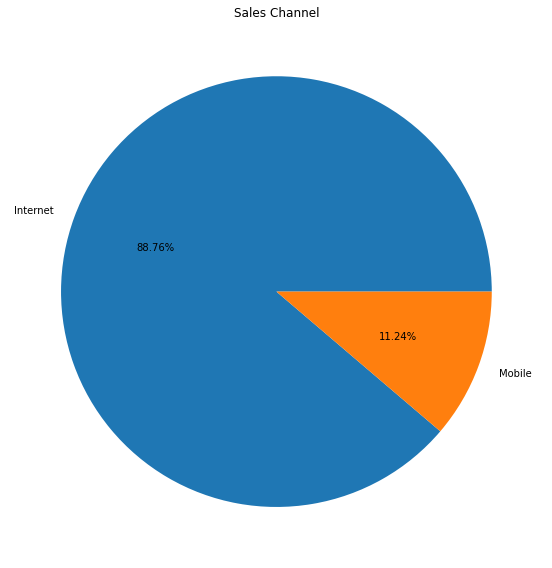

In [13]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct="%.2f%%")
plt.title('Sales Channel') 
plt.tight_layout()

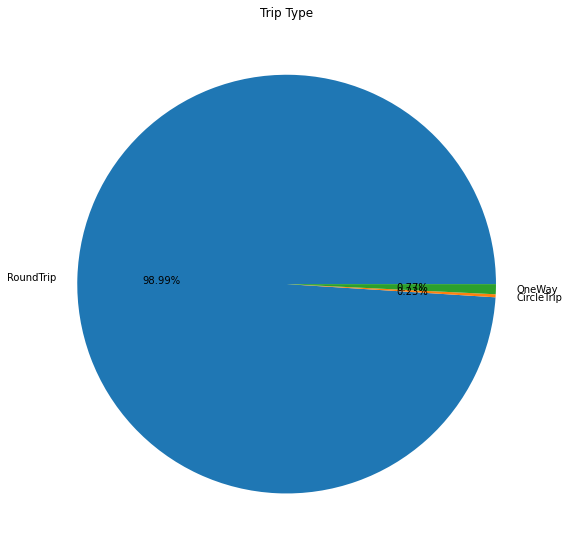

In [14]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c1[v]) for v in c1], labels=[str(k) for k in c1], autopct="%.2f%%")
plt.title('Trip Type') 
plt.tight_layout()

In [15]:
df1 = df.drop(['purchase_lead', 'wants_extra_baggage', 'wants_preferred_seat', 
                               'wants_in_flight_meals'], axis=1)
df1

,num_passengers,sales_channel,trip_type,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete
0,2,Internet,RoundTrip,19,7,Sat,AKLDEL,New Zealand,5.52,0
1,1,Internet,RoundTrip,20,3,Sat,AKLDEL,New Zealand,5.52,0
2,2,Internet,RoundTrip,22,17,Wed,AKLDEL,India,5.52,0
3,1,Internet,RoundTrip,31,4,Sat,AKLDEL,New Zealand,5.52,0
4,2,Internet,RoundTrip,22,15,Wed,AKLDEL,India,5.52,0
...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,6,9,Sat,PERPNH,Australia,5.62,0
49996,1,Internet,RoundTrip,6,4,Sun,PERPNH,Australia,5.62,0
49997,1,Internet,RoundTrip,6,22,Sat,PERPNH,Australia,5.62,0
49998,1,Internet,RoundTrip,6,11,Mon,PERPNH,Australia,5.62,0


In [16]:
df1 = df1.sort_values(by=['num_passengers','booking_origin'], 
                        ascending=False, ignore_index=True)
df1

,num_passengers,sales_channel,trip_type,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete
0,9,Internet,RoundTrip,5,5,Tue,DMKKIX,Thailand,7.00,0
1,9,Mobile,RoundTrip,6,19,Sat,CTSDMK,Thailand,8.67,0
2,9,Internet,RoundTrip,3,14,Thu,KNOTPE,Taiwan,4.67,0
3,9,Internet,RoundTrip,5,5,Tue,DPSTPE,Taiwan,4.67,0
4,9,Internet,RoundTrip,5,6,Tue,DPSTPE,Taiwan,4.67,0
...,...,...,...,...,...,...,...,...,...,...
49995,1,Internet,RoundTrip,6,0,Tue,CGKHND,(not set),7.57,0
49996,1,Internet,RoundTrip,6,1,Mon,HGHSIN,(not set),5.07,0
49997,1,Internet,RoundTrip,6,14,Fri,HGHTRZ,(not set),5.07,1
49998,1,Internet,RoundTrip,6,16,Wed,HNDPEN,(not set),7.57,1


In [17]:
# How many sales channel booking was made through internet?
sci_df = len(df1[(df1.sales_channel == 'Internet')])
per_net = df.sales_channel.value_counts().values[0] / df.sales_channel.count() *100
print("Number of sales channel booking made through Internet:", sci_df)
print("Percentage of sales channel booking made through Internet:", per_net)


# How many sales channel booking was made through mobile?
scm_df = len(df1[(df1.sales_channel == 'Mobile')])
per_mob = df.sales_channel.value_counts().values[1] / df.sales_channel.count() *100
print("Number of sales channel booking made through Mobile:", scm_df)
print("Percentage of sales channel booking made through Mobile:", per_mob)

Number of sales channel booking made through Internet: 44382
Percentage of sales channel booking made through Internet: 88.764
Number of sales channel booking made through Mobile: 5618
Percentage of sales channel booking made through Mobile: 11.236


In [18]:
# How many round trips booking were made?
prt_df = len(df1[(df1.num_passengers>0) & (df1.trip_type == 'RoundTrip')])
per_r = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
print("Number of round trips booking made:", prt_df)
print("Percentage of round trips booking made:", per_r)


# How many one way booking were made?
pow_df = len(df1[(df1.num_passengers>0) & (df1.trip_type == 'OneWay')])
per_o = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
print("Number of one way booking made:", pow_df)
print("Percentage of one way booking made:", per_o)


# How many circle trip booking were made?
pct_df = len(df1[(df1.num_passengers>0) & (df1.trip_type == 'CircleTrip')])
per_c = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print("Number of circle trip booking made:", pct_df)
print("Percentage of circle trip booking made:", per_c)

Number of round trips booking made: 49497
Percentage of round trips booking made: 98.994
Number of one way booking made: 387
Percentage of one way booking made: 0.774
Number of circle trip booking made: 116
Percentage of circle trip booking made: 0.232


In [19]:
# Maximum length of stay at a spefific destination
ls_df = df1['length_of_stay']
max_mls = ls_df.max()
min_mls = ls_df.min()
print("Maximum length of stay:", max_mls)
print("Minimum length of stay:", min_mls)


Maximum length of stay: 778
Minimum length of stay: 0


In [20]:
fd_df = df1['flight_day'].value_counts()
fd_df

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

**Maximum number of flights departed were on Monday while Saturday being the least.**

In [21]:
country_df = df1['booking_origin'].value_counts()
country_df

Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
               ...  
Malta              1
Bulgaria           1
Guatemala          1
Estonia            1
Slovakia           1
Name: booking_origin, Length: 104, dtype: int64

**From Australia maximum booking was made.** 

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

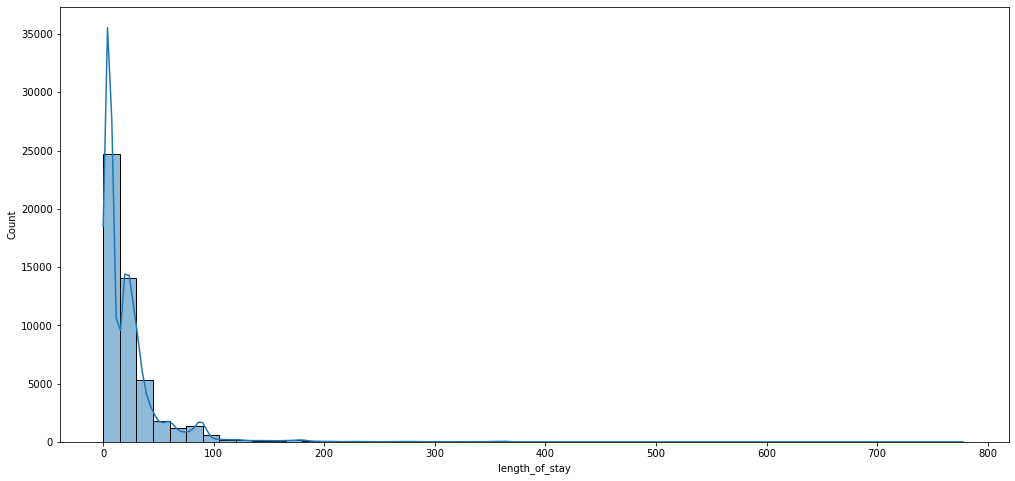

In [22]:
plt.figure(figsize=(17,8))
sns.histplot(data = df1, x="length_of_stay", binwidth=15, kde=True)

In [23]:
# Length of stay of bookings more than 100 days
ls_df = (df1.length_of_stay> 100).value_counts()
ls_df

False    48862
True      1138
Name: length_of_stay, dtype: int64

**There are a total of 1138 bookings made for spending more than 100 days at a specific destination.**

In [24]:
# Length of stay of bookings more than 550 days with complete booking
lscb_df = df1[df1.length_of_stay> 550].booking_complete.value_counts()
lscb_df

0    5
1    1
Name: booking_complete, dtype: int64

**As only 1 successful booking was done for a period of more than 550 days of stay at a specific destination, we will remove the entries of bookings with legth of stay more than 550 days.**

In [25]:
# How many successfull bookin was made
sb_df = df1['booking_complete'].value_counts()
sb_df

0    42522
1     7478
Name: booking_complete, dtype: int64

**We can see that a total of 7478 successfull bookings were made.**

Text(0, 0.5, 'Number of bookings made')

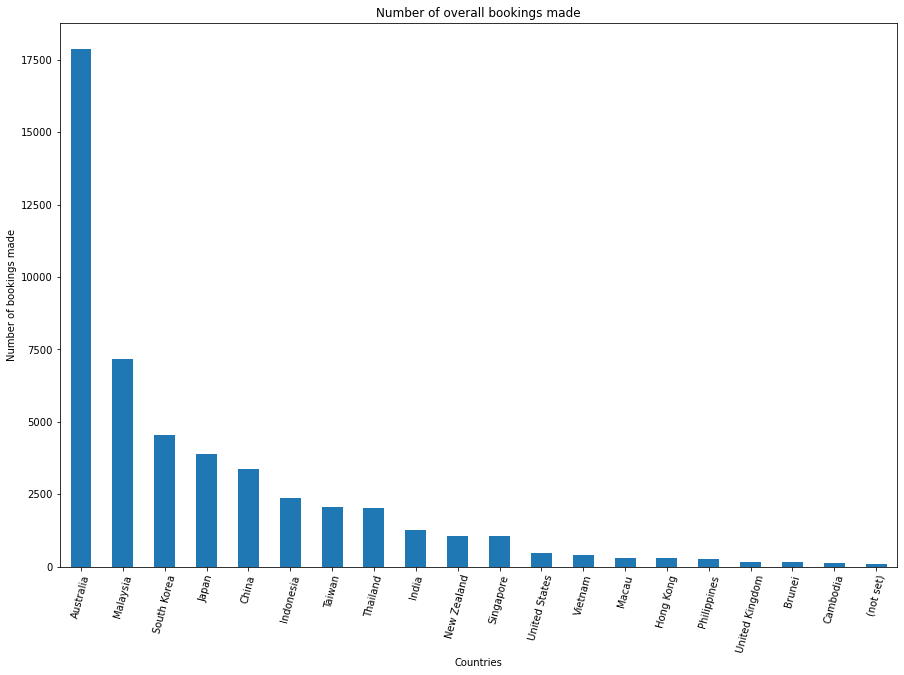

In [26]:
# Number of bookings made
bob_df = df1['booking_origin'].value_counts()[:20]
bob_df.plot(kind='bar',figsize=(15,10))
plt.xticks(rotation=75)
plt.title('Number of overall bookings made')
plt.xlabel('Countries')
plt.ylabel('Number of bookings made')

Text(0, 0.5, 'Number of complete bookings made')

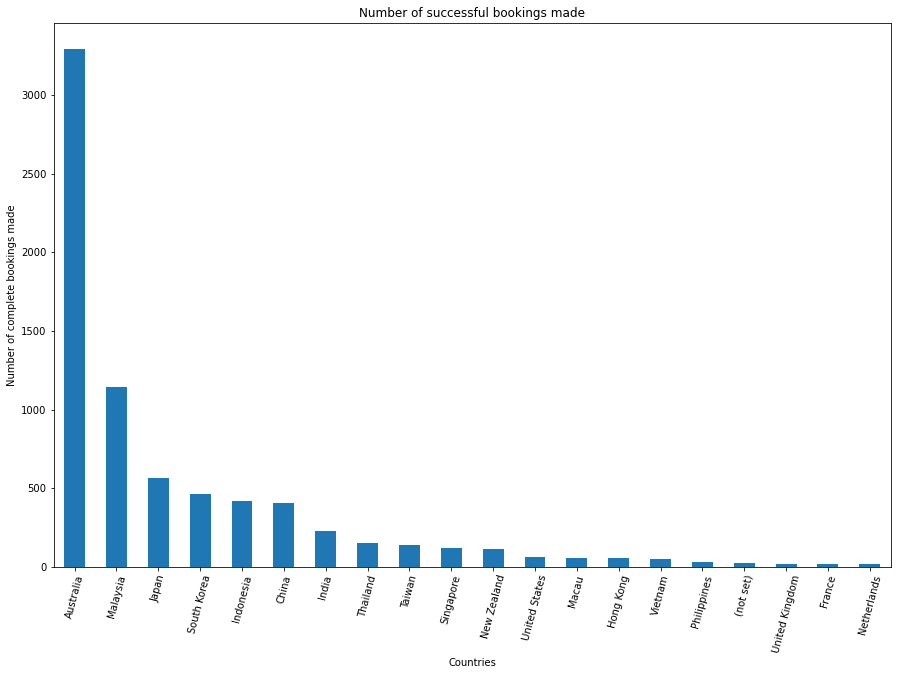

In [27]:
# Number of successfull bookings made
sbb_df = df1[df.booking_complete ==1].booking_origin.value_counts()[:20]
sbb_df.plot(kind='bar',figsize=(15,10))
plt.xticks(rotation=75)
plt.title('Number of successful bookings made')
plt.xlabel('Countries')
plt.ylabel('Number of complete bookings made')

**From Australia maximum bookings were made while from Malaysia maximum number of successful bookings were made.** 

In [28]:
ub_perc = df1['booking_complete'].value_counts().values[0] / len(df1) * 100
sb_perc = 100 - ub_perc
print(f"Out of 50000 overall booking, only {round(sb_perc,2)} % bookings were successfull.")

Out of 50000 overall booking, only 14.96 % bookings were successfull.


In [29]:
df2 = df[['purchase_lead','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']]
df2

,purchase_lead,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
0,262,1,0,0
1,112,0,0,0
2,243,1,1,0
3,96,0,0,1
4,68,1,0,1
...,...,...,...,...
49995,27,1,0,1
49996,111,0,0,0
49997,24,0,0,1
49998,15,1,0,1


<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

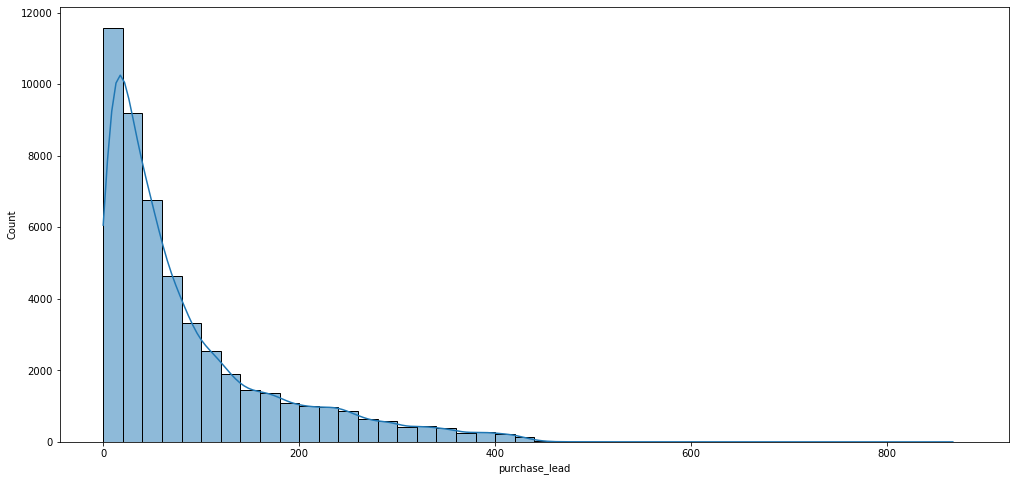

In [30]:
plt.figure(figsize=(17,8))
sns.histplot(data = df2, x="purchase_lead", binwidth=20, kde=True)

**From the graph, we can infer that few bookings were made after 1 and half year.**

In [31]:
plb_df = (df2['purchase_lead'] > 550).value_counts()
plb_df

False    49986
True        14
Name: purchase_lead, dtype: int64

**As we can see that only 14 successfull bookings were made in an interval of 1 and half year and assuming that no customer is booking in advance of more than 1 and half years, we will remove all entries with purchase_lead more than 550 days.**  

In [32]:
# Number of bookings where customer requires extra baggage
eb_df = df2['wants_extra_baggage'].value_counts()
eb_df

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [33]:
neb_perc = df2['wants_extra_baggage'].value_counts().values[1] / len(df2) * 100
eb_perc = 100 - neb_perc
print(f"Out of 50000 overall booking, only {round(eb_perc,2)} % bookings requires extra baggage.")

Out of 50000 overall booking, only 66.88 % bookings requires extra baggage.


In [34]:
# Number of bookings where customer requires a preferred seat
ps_df = df2['wants_preferred_seat'].value_counts()
ps_df

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

In [35]:
nps_perc = df2['wants_preferred_seat'].value_counts().values[0] / len(df2) * 100
ps_perc = 100 - nps_perc
print(f"Out of 50000 overall booking, only {round(ps_perc,2)} % bookings requires preferred seats.")

Out of 50000 overall booking, only 29.7 % bookings requires preferred seats.


In [36]:
# Number of bookings where customer requires in-flight meals
ifm_df = df2['wants_in_flight_meals'].value_counts()
ifm_df

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [37]:
nifm_perc = df2['wants_in_flight_meals'].value_counts().values[0] / len(df2) * 100
ifm_perc = 100 - nifm_perc
print(f"Out of 50000 overall booking, only {round(ifm_perc,2)} % bookings requires in-flight meals.")

Out of 50000 overall booking, only 42.71 % bookings requires in-flight meals.


### Filtering data


In [38]:
df3 = df.copy()

In [39]:
#filtering data to have purchase lead of less than 550 days
df3 = df3[df3['purchase_lead'] < 550 ]

In [40]:
#filtering data to have length of stay of less than 550 days
df3 = df3[df3['purchase_lead'] < 550 ]

In [41]:
df3

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [42]:
df['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [43]:
df3['flight_day'] = df3['flight_day'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})
df3

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,5,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,5,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,2,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,5,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,2,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,5,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,6,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,5,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,0,PERPNH,Australia,1,0,1,5.62,0


In [44]:
# Import label encoder
from sklearn import preprocessing

categ = ['sales_channel', 'trip_type', 'route', 'booking_origin']

label_encoder = preprocessing.LabelEncoder()

df3[categ] = df3[categ].apply(label_encoder.fit_transform)

In [45]:
df3

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,5,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,5,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,2,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,5,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,2,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,5,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,6,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,5,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,0,720,4,1,0,1,5.62,0


In [46]:
# Preprocessing
# Splitting data into features and target variable

X = df3.drop('booking_complete',axis=1) # Features
y = df3['booking_complete'] # Target variable  

In [47]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [48]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (34990, 13)
X_test shape  is :  (14996, 13)
y_train shape is :  (34990,)
y_test shape is  :  (14996,)


In [49]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))
print('Test dataset shape %s' % Counter(y_test.values.ravel()))

Original dataset shape Counter({0: 29682, 1: 5308})
Test dataset shape Counter({0: 12828, 1: 2168})


<AxesSubplot:>

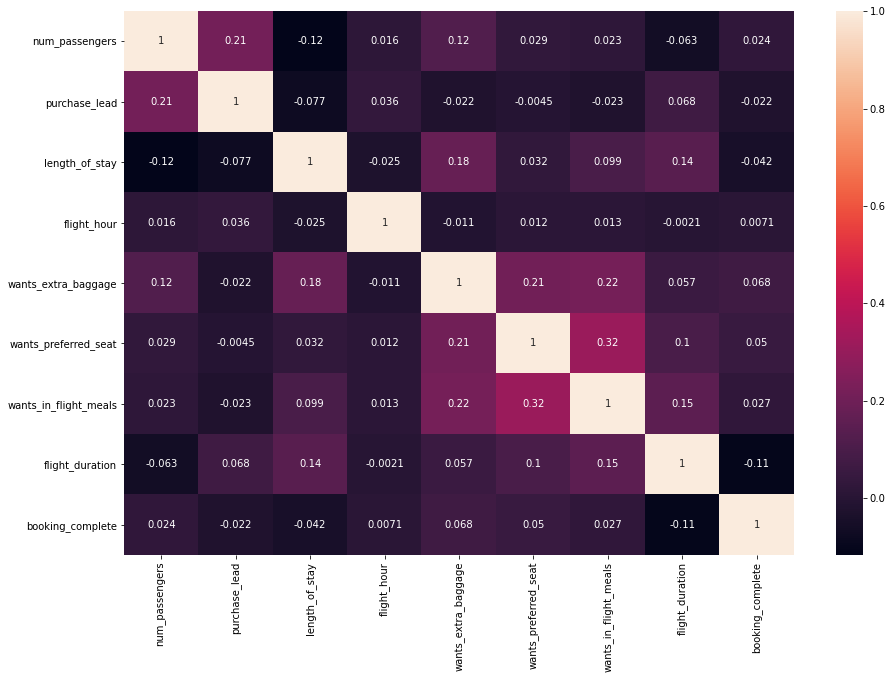

In [50]:
#Correlation matrix
df3.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

In [51]:
correlation = df3.corr()['num_passengers'].abs().sort_values(ascending = False)
correlation

num_passengers           1.000000
purchase_lead            0.213322
wants_extra_baggage      0.120409
length_of_stay           0.115870
flight_duration          0.063178
booking_origin           0.052309
route                    0.048519
wants_preferred_seat     0.028566
booking_complete         0.023989
wants_in_flight_meals    0.022857
flight_hour              0.015656
flight_day               0.015378
sales_channel            0.002366
trip_type                0.002256
Name: num_passengers, dtype: float64

## (D). Feature Selection:

### (1). Feature selection using Random Forest

In [52]:
def print_best_worst (scores):
    scores = sorted(scores, reverse = True)
    
    print("The 5 best features selected by this method are :")
    for i in range(5):
        print(scores[i][1])
    
    print ("The 5 worst features selected by this method are :")
    for i in range(5):
        print(scores[len(scores)-1-i][1])

Feature: 0, Score: 0.04874
Feature: 1, Score: 0.01163
Feature: 2, Score: 0.00168
Feature: 3, Score: 0.19437
Feature: 4, Score: 0.12836
Feature: 5, Score: 0.14350
Feature: 6, Score: 0.09311
Feature: 7, Score: 0.14900
Feature: 8, Score: 0.10684
Feature: 9, Score: 0.01464
Feature: 10, Score: 0.01584
Feature: 11, Score: 0.02200
Feature: 12, Score: 0.07030
The 5 best features selected by this method are :
purchase_lead
route
flight_hour
length_of_stay
booking_origin
The 5 worst features selected by this method are :
trip_type
sales_channel
wants_extra_baggage
wants_preferred_seat
wants_in_flight_meals


<AxesSubplot:xlabel='Features', ylabel='Importances'>

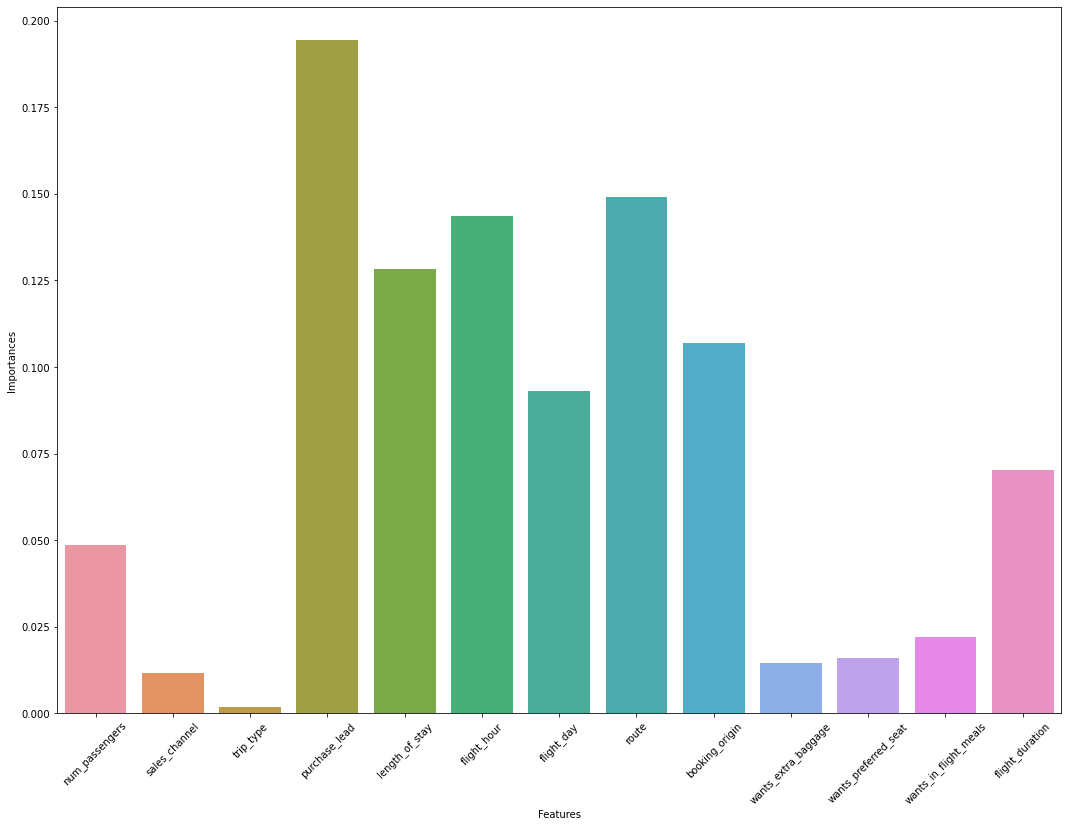

In [53]:
# define the model
rfmodel_feat = RandomForestClassifier(n_estimators=100)

# fit the model
rfmodel_feat.fit(X, y)

# get importance
rfimportance = rfmodel_feat.feature_importances_

# summarize feature importance
for i,v in enumerate(rfimportance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
scores = []
num_features = len(X.columns)

for i in range(num_features):
    scores.append((rfmodel_feat.feature_importances_[i],X.columns[i]))
        
print_best_worst(scores)
    
# plot feature importance
rffeat_df = pd.DataFrame({"Features": X.columns, "Importances":rfimportance})
rffeat_df.set_index('Importances')
plt.figure(figsize=(18,13))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=rffeat_df)

### (2). Feature selection using L2-regularization (Ridge)

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'l2'))     
grid = GridSearchCV(pipe, param_grid, cv = 10)
grid.fit(X, y)
print(grid.best_params_)

{'logisticregression__C': 0.001}


In [55]:
X_scaled = StandardScaler().fit_transform(X)
lrfeat_clf = LogisticRegression(penalty = 'l2', C = 0.001)
lrfeat_clf.fit(X_scaled,y)

LogisticRegression(C=0.001)

In [56]:
abs_feat = []
for i in range(num_features):
    coef = lrfeat_clf.coef_[0,i]
    abs_feat.append((abs(coef), X.columns[i]))
        
print (sorted(abs_feat, reverse = True))

[(0.2778448018565972, 'booking_origin'), (0.2240152828839362, 'flight_duration'), (0.17194141836950577, 'wants_extra_baggage'), (0.12443588435865431, 'sales_channel'), (0.11441930931274173, 'wants_preferred_seat'), (0.10767578745126075, 'length_of_stay'), (0.08546539413379764, 'trip_type'), (0.06343318229289424, 'purchase_lead'), (0.055763803874890355, 'wants_in_flight_meals'), (0.05006557537238981, 'route'), (0.012448108005629862, 'num_passengers'), (0.008709415988965899, 'flight_hour'), (0.005948958626898737, 'flight_day')]


## (E). Model Prediction:

## Model prediction using the top 5 features:

In [57]:
features = ['booking_origin', 'purchase_lead','length_of_stay','route','flight_duration']

In [58]:
X = df3[features] # Features
y = df3['booking_complete'] # Target variable   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (34990, 5)
Y_Train Shape: (34990,)
X_Test Shape: (14996, 5)
Y_Test Shape: (14996,)


In [59]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({0: 29816, 1: 5174})


## Model-1: Random Forest

### (1). Using Top 5 Features

In [60]:
from sklearn.ensemble import RandomForestClassifier  

#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
rfclf = RandomForestClassifier(n_estimators=100)
rfclf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [61]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred = rfclf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11930   764]
 [ 1803   499]]
Accuracy: 0.8288210189383836


In [62]:
print('Random Forest')

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Random Forest
[[11930   764]
 [ 1803   499]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12694
           1       0.40      0.22      0.28      2302

    accuracy                           0.83     14996
   macro avg       0.63      0.58      0.59     14996
weighted avg       0.80      0.83      0.81     14996

Accuracy: 0.8288210189383836
Precision: 0.3950910530482977
Recall: 0.21676802780191137
F1 Score: 0.2799438990182328
Mean Absolute Error: 0.17117898106161644
ROC AUC: 0.5782910565982929
Train Time(s):  5.3369797000000005
Test Time(s):  0.5359569999999962


### Parameter tuning using Grid Search:

In [63]:
# Hyperparameters that we want to tune.
rfgrid_params = { 'max_depth': list(range(1, 10)),
                 'min_samples_leaf': [5, 10, 20, 50, 100],
                 'n_estimators': [100, 200, 300, 1000],
                 'bootstrap': [True, False]}

rfgs = GridSearchCV(RandomForestClassifier(), rfgrid_params, cv=10, n_jobs = -1, scoring = "accuracy")

In [64]:
rfgs

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy')

In [65]:
# fitting the model for grid search 
rfgs_res = rfgs.fit(X_train, y_train)

In [66]:
# find the best score
rfgs_res.best_score_

0.8522434981423264

In [67]:
# get the hyperparameters with the best score
rfgs_res.best_params_

{'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 300}

In [68]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
rfgsclf=RandomForestClassifier(bootstrap = False,  max_depth = 9,  min_samples_leaf = 5,  n_estimators = 100)
rfgsclf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [69]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred1 = rfgsclf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

[[12687     7]
 [ 2289    13]]
Accuracy: 0.8468925046679114


In [70]:
print('Random Forest Hyperparametertuning using top-5 features')

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred1))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred1))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred1))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred1))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred1))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Random Forest Hyperparametertuning using top-5 features
[[12687     7]
 [ 2289    13]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12694
           1       0.65      0.01      0.01      2302

    accuracy                           0.85     14996
   macro avg       0.75      0.50      0.46     14996
weighted avg       0.82      0.85      0.78     14996

Accuracy: 0.8468925046679114
Precision: 0.65
Recall: 0.005647263249348393
F1 Score: 0.011197243755383291
Mean Absolute Error: 0.15310749533208856
ROC AUC: 0.5025479108116917
Train Time(s):  4.01002470000094
Test Time(s):  0.291795799999818


### (2). Random Forest using all Features

In [71]:
X1 = df3.drop('booking_complete',axis=1) # Features
y1 = df3['booking_complete'] # Target variable   

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (34990, 13)
Y_Train Shape: (34990,)
X_Test Shape: (14996, 13)
Y_Test Shape: (14996,)


In [72]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
rffullclf=RandomForestClassifier(bootstrap = False,  max_depth = 9,  min_samples_leaf = 5,  n_estimators = 100)
rffullclf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [73]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred2 = rffullclf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred2))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

[[12812     5]
 [ 2174     5]]
Accuracy: 0.854694585222726


In [74]:
print('Random Forest using all features')

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred2))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred2))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred2))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred2))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred2))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Random Forest using all features
[[12812     5]
 [ 2174     5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12817
           1       0.50      0.00      0.00      2179

    accuracy                           0.85     14996
   macro avg       0.68      0.50      0.46     14996
weighted avg       0.80      0.85      0.79     14996

Accuracy: 0.854694585222726
Precision: 0.5
Recall: 0.002294630564479119
F1 Score: 0.004568296025582458
Mean Absolute Error: 0.14530541477727393
ROC AUC: 0.5009522618375958
Train Time(s):  4.069420899999386
Test Time(s):  0.29167640000014217


## Model-2: XGBoost

### (1). Using Top 5 Features

In [75]:
X = df3[features] # Features
y = df3['booking_complete'] # Target variable   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (34990, 5)
Y_Train Shape: (34990,)
X_Test Shape: (14996, 5)
Y_Test Shape: (14996,)


In [76]:
#Calculate start time
start = timeit.default_timer()

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

[20:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred3 = xgb.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred3))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

[[12473   222]
 [ 2133   168]]
Accuracy: 0.8429581221659109


In [78]:
print('XGBoost using top-5 features')

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred3))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred3))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred3))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred3))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred3))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

XGBoost using top-5 features
[[12473   222]
 [ 2133   168]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12695
           1       0.43      0.07      0.12      2301

    accuracy                           0.84     14996
   macro avg       0.64      0.53      0.52     14996
weighted avg       0.79      0.84      0.79     14996

Accuracy: 0.8429581221659109
Precision: 0.4307692307692308
Recall: 0.07301173402868318
F1 Score: 0.12486064659977701
Mean Absolute Error: 0.1570418778340891
ROC AUC: 0.5277622671718839
Train Time(s):  1.9815559000016947
Test Time(s):  0.020797199998924043


### Parameter tuning using Grid Search:

In [79]:
# A parameter grid for XGBoost
xgbgs_params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'reg_lambda': [0.5, 1]}

xgbgs = GridSearchCV(XGBClassifier(), xgbgs_params, cv=10, n_jobs = -1, refit='recall', scoring = "accuracy")

In [80]:
xgbgs

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [81]:
# fitting the model for grid search 
xgbgs_res = xgbgs.fit(X_train, y_train)

[20:28:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
# find the best score
xgbgs_res.best_score_

0.8522149185481565

In [83]:
# get the hyperparameters with the best score
xgbgs_res.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 3,
 'min_child_weight': 10,
 'reg_lambda': 0.5}

In [84]:
#Calculate start time
start = timeit.default_timer()

xgbgs = XGBClassifier(colsample_bytree = 1.0, gamma = 0.5, max_depth = 4, min_child_weight = 5, reg_lambda = 1)
xgbgs.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

[20:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred4 = xgbgs.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred4))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

[[12576   119]
 [ 2220    81]]
Accuracy: 0.8440250733528941


In [86]:
print('XGBoost Hyperparametertuning using top-5 features')

print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred4))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred4))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred4))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred4))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred4))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

XGBoost Hyperparametertuning using top-5 features
[[12576   119]
 [ 2220    81]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12695
           1       0.41      0.04      0.06      2301

    accuracy                           0.84     14996
   macro avg       0.63      0.51      0.49     14996
weighted avg       0.78      0.84      0.78     14996

Accuracy: 0.8440250733528941
Precision: 0.405
Recall: 0.035202086049543675
F1 Score: 0.06477409036385445
Mean Absolute Error: 0.15597492664710588
ROC AUC: 0.5129141584245355
Train Time(s):  1.7648734000013064
Test Time(s):  0.026174399999945308


### (2). XGBoost using all Features

In [87]:
X2 = df3.drop('booking_complete',axis=1) # Features
y2 = df3['booking_complete'] # Target variable   

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (34990, 13)
Y_Train Shape: (34990,)
X_Test Shape: (14996, 13)
Y_Test Shape: (14996,)


In [88]:
#Calculate start time
start = timeit.default_timer()

xgb_full = XGBClassifier(colsample_bytree = 1.0, gamma = 0.5, max_depth = 4, min_child_weight = 5, reg_lambda = 1)
xgb_full.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

[20:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [89]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred5 = xgb_full.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred5))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

[[12573   200]
 [ 2026   197]]
Accuracy: 0.8515604161109629


In [90]:
print('XGBoost using all features')

print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred5))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred5))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred5))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred5))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred5))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

XGBoost using all features
[[12573   200]
 [ 2026   197]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     12773
           1       0.50      0.09      0.15      2223

    accuracy                           0.85     14996
   macro avg       0.68      0.54      0.53     14996
weighted avg       0.81      0.85      0.80     14996

Accuracy: 0.8515604161109629
Precision: 0.49622166246851385
Recall: 0.08861898335582546
F1 Score: 0.150381679389313
Mean Absolute Error: 0.14843958388903708
ROC AUC: 0.5364804773508165
Train Time(s):  1.836091999999553
Test Time(s):  0.026900299999397248


## Model-3: CatBoost

### (1). Using Top 5 Features

In [91]:
X = df3[features] # Features
y = df3['booking_complete'] # Target variable   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (34990, 5)
Y_Train Shape: (34990,)
X_Test Shape: (14996, 5)
Y_Test Shape: (14996,)


In [92]:
#Calculate start time
start = timeit.default_timer()

catb = CatBoostClassifier()
catb.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

Learning rate set to 0.047011
0:	learn: 0.6592971	total: 174ms	remaining: 2m 53s
1:	learn: 0.6289950	total: 190ms	remaining: 1m 35s
2:	learn: 0.6019900	total: 210ms	remaining: 1m 9s
3:	learn: 0.5799739	total: 231ms	remaining: 57.6s
4:	learn: 0.5589991	total: 250ms	remaining: 49.8s
5:	learn: 0.5395463	total: 268ms	remaining: 44.3s
6:	learn: 0.5222584	total: 285ms	remaining: 40.4s
7:	learn: 0.5077117	total: 301ms	remaining: 37.3s
8:	learn: 0.4944545	total: 321ms	remaining: 35.4s
9:	learn: 0.4837717	total: 342ms	remaining: 33.9s
10:	learn: 0.4737772	total: 367ms	remaining: 33s
11:	learn: 0.4648737	total: 395ms	remaining: 32.5s
12:	learn: 0.4559137	total: 417ms	remaining: 31.6s
13:	learn: 0.4491083	total: 444ms	remaining: 31.3s
14:	learn: 0.4423056	total: 470ms	remaining: 30.9s
15:	learn: 0.4375440	total: 496ms	remaining: 30.5s
16:	learn: 0.4317325	total: 532ms	remaining: 30.8s
17:	learn: 0.4263668	total: 558ms	remaining: 30.4s
18:	learn: 0.4223163	total: 586ms	remaining: 30.2s
19:	learn: 

In [93]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred6 = catb.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred6))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

[[12664    93]
 [ 2155    84]]
Accuracy: 0.850093358228861


In [94]:
print('CatBoost using top-5 features')

print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred6))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred6))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred6))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred6))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred6))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

CatBoost using top-5 features
[[12664    93]
 [ 2155    84]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     12757
           1       0.47      0.04      0.07      2239

    accuracy                           0.85     14996
   macro avg       0.66      0.52      0.49     14996
weighted avg       0.80      0.85      0.79     14996

Accuracy: 0.850093358228861
Precision: 0.4745762711864407
Recall: 0.037516748548459135
F1 Score: 0.06953642384105961
Mean Absolute Error: 0.14990664177113897
ROC AUC: 0.5151133166588028
Train Time(s):  26.783093300000473
Test Time(s):  0.028098000000682077


### Parameter tuning using Grid Search:

In [95]:
# A parameter grid for XGBoost
catgs_params = {'learning_rate': [0.01,0.02,0.04],
                'depth': [3, 4, 5],
                'l2_leaf_reg': [1, 3, 5,]}

catgs = GridSearchCV(CatBoostClassifier(), catgs_params, n_jobs = -1, cv = 5, scoring ='accuracy')

In [96]:
catgs

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000029362BB1280>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.02, 0.04]},
             scoring='accuracy')

In [97]:
# fitting the model for grid search 
catgs_res = catgs.fit(X_train, y_train)

0:	learn: 0.6857799	total: 29.7ms	remaining: 29.6s
1:	learn: 0.6784026	total: 64.9ms	remaining: 32.4s
2:	learn: 0.6713255	total: 104ms	remaining: 34.4s
3:	learn: 0.6645816	total: 133ms	remaining: 33.2s
4:	learn: 0.6577432	total: 162ms	remaining: 32.2s
5:	learn: 0.6510901	total: 188ms	remaining: 31.2s
6:	learn: 0.6446735	total: 217ms	remaining: 30.8s
7:	learn: 0.6387508	total: 247ms	remaining: 30.6s
8:	learn: 0.6328528	total: 278ms	remaining: 30.7s
9:	learn: 0.6267720	total: 308ms	remaining: 30.5s
10:	learn: 0.6208855	total: 340ms	remaining: 30.6s
11:	learn: 0.6151808	total: 374ms	remaining: 30.8s
12:	learn: 0.6096097	total: 408ms	remaining: 31s
13:	learn: 0.6042039	total: 444ms	remaining: 31.3s
14:	learn: 0.5991434	total: 474ms	remaining: 31.2s
15:	learn: 0.5940373	total: 506ms	remaining: 31.1s
16:	learn: 0.5891521	total: 536ms	remaining: 31s
17:	learn: 0.5844157	total: 560ms	remaining: 30.6s
18:	learn: 0.5800211	total: 584ms	remaining: 30.2s
19:	learn: 0.5756491	total: 610ms	remaining

In [98]:
# find the best score
catgs_res.best_score_

0.8503858245212917

In [99]:
# get the hyperparameters with the best score
catgs_res.best_params_

{'depth': 5, 'l2_leaf_reg': 5, 'learning_rate': 0.01}

In [110]:
#Calculate start time
start = timeit.default_timer()

catbgs = CatBoostClassifier(depth = 3, l2_leaf_reg = 3, learning_rate = 0.04)
catbgs.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

0:	learn: 0.6644391	total: 10.7ms	remaining: 10.7s
1:	learn: 0.6377125	total: 19.7ms	remaining: 9.81s
2:	learn: 0.6147043	total: 31.4ms	remaining: 10.4s
3:	learn: 0.5947550	total: 45.7ms	remaining: 11.4s
4:	learn: 0.5755190	total: 55.6ms	remaining: 11.1s
5:	learn: 0.5578749	total: 64.3ms	remaining: 10.7s
6:	learn: 0.5419304	total: 73ms	remaining: 10.4s
7:	learn: 0.5293342	total: 81.3ms	remaining: 10.1s
8:	learn: 0.5184107	total: 89.2ms	remaining: 9.82s
9:	learn: 0.5083543	total: 97.7ms	remaining: 9.67s
10:	learn: 0.4973766	total: 106ms	remaining: 9.5s
11:	learn: 0.4872829	total: 114ms	remaining: 9.42s
12:	learn: 0.4794283	total: 123ms	remaining: 9.37s
13:	learn: 0.4725466	total: 133ms	remaining: 9.37s
14:	learn: 0.4657274	total: 143ms	remaining: 9.37s
15:	learn: 0.4597941	total: 152ms	remaining: 9.35s
16:	learn: 0.4537871	total: 159ms	remaining: 9.21s
17:	learn: 0.4480168	total: 169ms	remaining: 9.2s
18:	learn: 0.4430451	total: 177ms	remaining: 9.13s
19:	learn: 0.4387352	total: 185ms	r

In [111]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred7 = catbgs.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred7))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))

[[12727    30]
 [ 2208    31]]
Accuracy: 0.8507602027207255


In [112]:
print('CatBoost Hyperparametertuning using top-5 features')

print(confusion_matrix(y_test,y_pred7))
print(classification_report(y_test,y_pred7))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred7))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred7))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred7))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred7))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred7))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

CatBoost Hyperparametertuning using top-5 features
[[12727    30]
 [ 2208    31]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12757
           1       0.51      0.01      0.03      2239

    accuracy                           0.85     14996
   macro avg       0.68      0.51      0.47     14996
weighted avg       0.80      0.85      0.79     14996

Accuracy: 0.8507602027207255
Precision: 0.5081967213114754
Recall: 0.013845466726217061
F1 Score: 0.026956521739130435
Mean Absolute Error: 0.14923979727927447
ROC AUC: 0.5057469083258741
Train Time(s):  11.06523080000079
Test Time(s):  0.023227900001074886


### (2). CatBoost using all Features

In [113]:
X3 = df3.drop('booking_complete',axis=1) # Features
y3 = df3['booking_complete'] # Target variable   

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (34990, 13)
Y_Train Shape: (34990,)
X_Test Shape: (14996, 13)
Y_Test Shape: (14996,)


In [116]:
#Calculate start time
start = timeit.default_timer()

catb_full = CatBoostClassifier(depth = 5, l2_leaf_reg = 5, learning_rate = 0.01, 
                               loss_function = 'Logloss', eval_metric = 'Accuracy')
catb_full.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

0:	learn: 0.8506716	total: 11.3ms	remaining: 11.3s
1:	learn: 0.8506716	total: 27ms	remaining: 13.5s
2:	learn: 0.8506716	total: 46.9ms	remaining: 15.6s
3:	learn: 0.8506716	total: 61.1ms	remaining: 15.2s
4:	learn: 0.8506716	total: 76.2ms	remaining: 15.2s
5:	learn: 0.8506716	total: 88.8ms	remaining: 14.7s
6:	learn: 0.8506716	total: 102ms	remaining: 14.5s
7:	learn: 0.8506716	total: 115ms	remaining: 14.3s
8:	learn: 0.8506716	total: 128ms	remaining: 14.1s
9:	learn: 0.8506716	total: 142ms	remaining: 14s
10:	learn: 0.8506716	total: 156ms	remaining: 14s
11:	learn: 0.8506716	total: 168ms	remaining: 13.8s
12:	learn: 0.8506716	total: 181ms	remaining: 13.7s
13:	learn: 0.8506716	total: 195ms	remaining: 13.7s
14:	learn: 0.8506716	total: 212ms	remaining: 13.9s
15:	learn: 0.8506716	total: 228ms	remaining: 14s
16:	learn: 0.8506716	total: 239ms	remaining: 13.8s
17:	learn: 0.8506716	total: 254ms	remaining: 13.8s
18:	learn: 0.8506716	total: 267ms	remaining: 13.8s
19:	learn: 0.8506716	total: 282ms	remaining

In [117]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred8 = catb_full.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred8))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))

[[12682    63]
 [ 2204    47]]
Accuracy: 0.8488263536943185


In [118]:
print('CatBoost using all features')

print(confusion_matrix(y_test,y_pred8))
print(classification_report(y_test,y_pred8))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred8))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred8))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred8))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred8))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred8))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

CatBoost using all features
[[12682    63]
 [ 2204    47]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12745
           1       0.43      0.02      0.04      2251

    accuracy                           0.85     14996
   macro avg       0.64      0.51      0.48     14996
weighted avg       0.79      0.85      0.79     14996

Accuracy: 0.8488263536943185
Precision: 0.42727272727272725
Recall: 0.02087960906263883
F1 Score: 0.039813638288860656
Mean Absolute Error: 0.1511736463056815
ROC AUC: 0.5079682470578004
Train Time(s):  15.651303200000257
Test Time(s):  0.021257000000332482


## (F).  Model Comparison:

### Model Comparison of classifiers using only top 5 features: 

Text(0.5, 1.0, 'Accuracy of all the three classifiers (Using only top 5 features)')

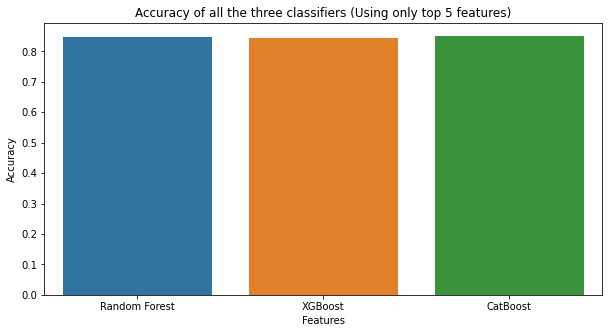

In [123]:
# Accuracy
m = 'Random Forest','XGBoost','CatBoost'
n = 0.8468,0.8440,0.8507
acc_eval = pd.DataFrame({'Features':m, 'Accuracy':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'Accuracy' , data = acc_eval)
plt.title('Accuracy of all the three classifiers (Using only top 5 features)')

Text(0.5, 1.0, 'F1-scores of all the three classifiers (Using only top 5 features)')

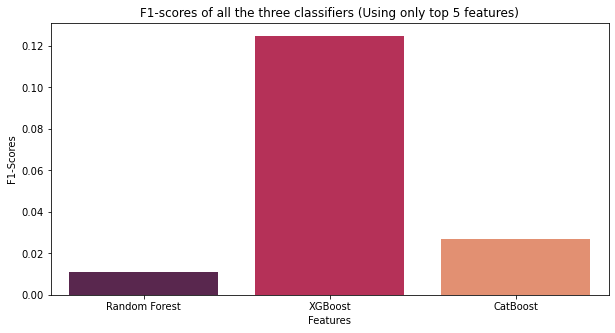

In [124]:
# F1 Score
m = 'Random Forest','XGBoost','CatBoost'
n = 0.0111,0.1248,0.0269
f1_eval = pd.DataFrame({'Features':m, 'F1-Scores':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'F1-Scores' , palette='rocket', data = f1_eval)
plt.title('F1-scores of all the three classifiers (Using only top 5 features)')

Text(0.5, 1.0, 'Mean Absolute Error of all the three classifiers (Using only top 5 features)')

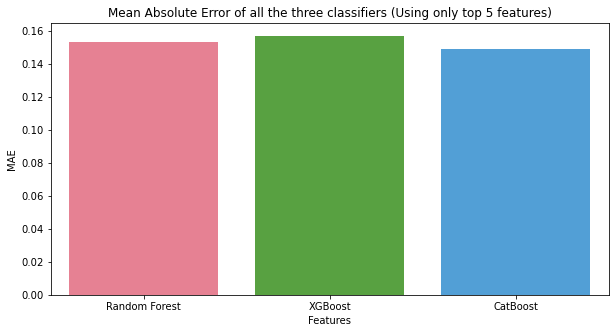

In [125]:
# Mean Absolute Error
m = 'Random Forest','XGBoost','CatBoost'
n = 0.1531,0.1570,0.1492
mae_eval = pd.DataFrame({'Features':m, 'MAE':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'MAE' , palette='husl', data = mae_eval)
plt.title('Mean Absolute Error of all the three classifiers (Using only top 5 features)')

Text(0.5, 1.0, 'ROC-AUC of all the three classifiers (Using only top 5 features)')

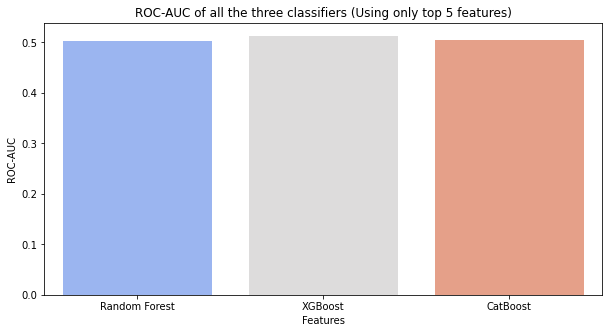

In [126]:
# ROC-AUC
m = 'Random Forest','XGBoost','CatBoost'
n = 0.5025,0.5129,0.5057
roc_eval = pd.DataFrame({'Features':m, 'ROC-AUC':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'ROC-AUC' , palette='coolwarm', data = roc_eval)
plt.title('ROC-AUC of all the three classifiers (Using only top 5 features)')

### Model Comparison of classifiers using all features: 

Text(0.5, 1.0, 'Accuracy of all the three classifiers (Using all features)')

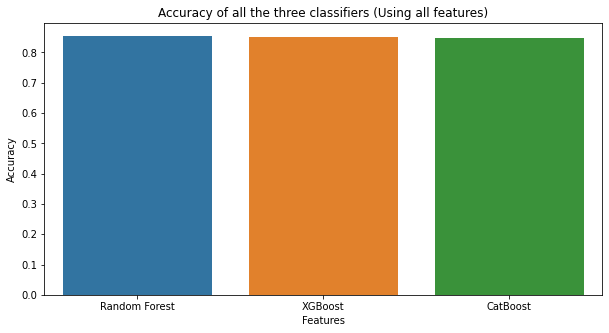

In [127]:
# Accuracy
m = 'Random Forest','XGBoost','CatBoost'
n = 0.8546,0.8515,0.8488
acc_eval = pd.DataFrame({'Features':m, 'Accuracy':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'Accuracy' , data = acc_eval)
plt.title('Accuracy of all the three classifiers (Using all features)')

Text(0.5, 1.0, 'F1-scores of all the three classifiers (Using all features)')

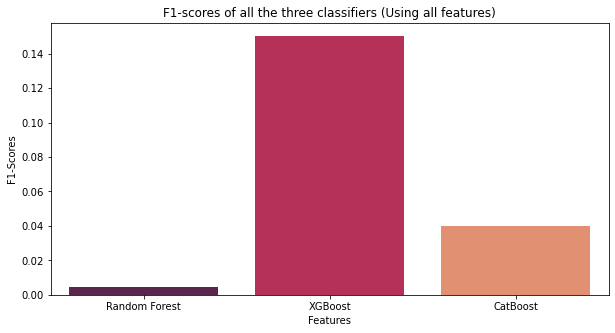

In [128]:
# F1 Score
m = 'Random Forest','XGBoost','CatBoost'
n = 0.0045,0.1503,0.0398
f1_eval = pd.DataFrame({'Features':m, 'F1-Scores':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'F1-Scores' , palette='rocket', data = f1_eval)
plt.title('F1-scores of all the three classifiers (Using all features)')

Text(0.5, 1.0, 'Mean Absolute Error of all the three classifiers (Using all features)')

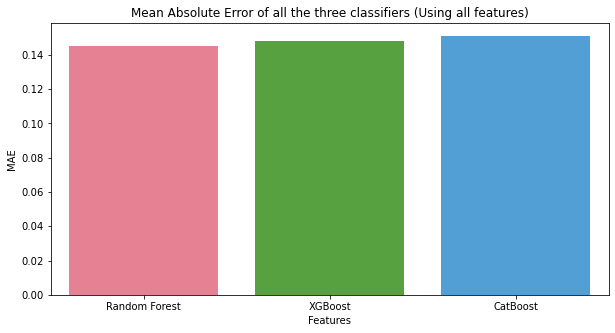

In [129]:
# Mean Absolute Error
m = 'Random Forest','XGBoost','CatBoost'
n = 0.1453,0.1484,0.1511
mae_eval = pd.DataFrame({'Features':m, 'MAE':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'MAE' , palette='husl', data = mae_eval)
plt.title('Mean Absolute Error of all the three classifiers (Using all features)')

Text(0.5, 1.0, 'ROC-AUC of all the three classifiers (Using all features)')

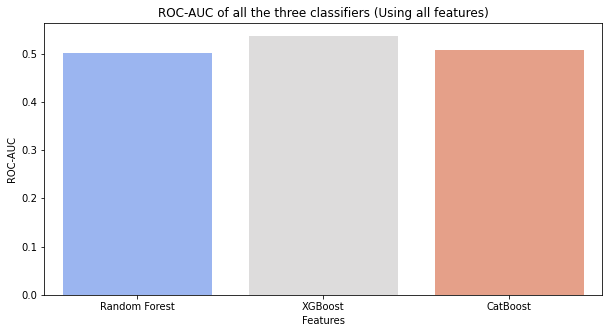

In [130]:
# ROC-AUC
m = 'Random Forest','XGBoost','CatBoost'
n = 0.5009,0.5364,0.5079
roc_eval = pd.DataFrame({'Features':m, 'ROC-AUC':n})
plt.figure(figsize=(10,5))
sns.barplot(x = 'Features' ,y = 'ROC-AUC' , palette='coolwarm', data = roc_eval)
plt.title('ROC-AUC of all the three classifiers (Using all features)')